# Subplots with Job Titles by Schedule (2.13.2) - Problem

Problem Statement: Create a subplot with 2 rows and 2 columns:

In each subplot, plot a bar chart of the top 3 job titles by the number of job postings for each job schedule type (Full-time, Part-time, Contractor, and Internship).
Use fig.tight_layout() to adjust the spacing between subplots.

In [4]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']

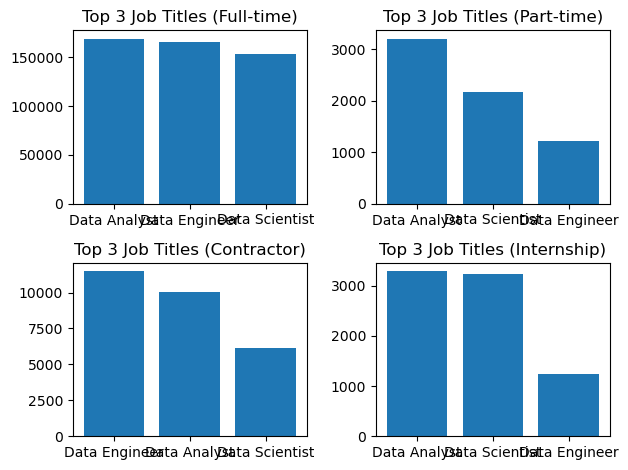

In [14]:
fig, ax = plt.subplots(2, 2)

schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']

for i, schedules in enumerate(schedules):
    df_schedule = df[df['job_schedule_type'] == schedules]
    job_titles = df_schedule['job_title_short'].value_counts().head(3)
    ax[i//2, i%2].bar(job_titles.index, job_titles.values)
    ax[i//2, i%2].set_title(f'Top 3 Job Titles ({schedules})')

fig.tight_layout()
plt.show()